# Machine Learning Clustering in Python
In diesem Beitrag zeigen und vergleichen wir verschiedene Verfahren zum Clustering in Python. Unter Clustering versteht man das Zusammenfassen verschiedener Objekte zu Gruppen aus ähnlichen Objekten. Beispielsweise die Segmentierung von verschiedenen Käufergruppen im Einzelhandel.

Beim Clustering werden die einzelnen Eigenschaften eines Objekts mit den Eigenschaften anderer Objekte in einem Vektorraum verglichen. Ziel ist es in diesem Vektorraum auf Zusammenhänge zu schließen, mit denen sich einzelnen Gruppen der Objekte in einem Datensatz bilden lassen. Die einzelnen Vektoren, die dabei für die verschiedenen Eigenschaften eines Objekts stehen, werden auf ihre Nähe zu den Vektoren anderer Objekte hin, in Cluster eingeteilt. Um die Nähe zweier Vektoren zu bestimmen ist prinzipiell jede Metrik zulässig. Meistens wird jedoch die euklidische Distanz, oder die quadrierte euklidische Distanz (L2-Norm) verwendet.

Häufig werden <a href="https://rocketloop.de/was-ist-machine-learning/#supervised-unsupervised-learning">Unsupervised Learning</a> Modelle für das Clustering verwendet. Dies bietet den Vorteil, dass keine bzw. nur wenige Annahmen über die zu findenden Cluster von vorneherein getroffen werden müssen. In diesem Beitrag gehen wir ausschließlich auf solche Modelle ein, da diese am weitesten verbreitet sind. Der Nachteil den diese Ansätze mit sich bringen liegt darin Grundlagen zur Beurteilung des Ergebnisses zu finden, um auf diesen die einzelnen Verfahren zu vergleichen und zu bewerten.

Clustering kann dabei mit verschiedenen Ansätzen gelöst werden. Für weitere Informationen zur Funktionsweise verweisen wir an dieser Stelle auf unseren <a href="https://rocketloop.de/clustering-mit-machine-learning/">Blog</a>.
## Clusteringvalidierung
Es ist sehr schwer ein Clusteringergebnis objektiv zu bewerten, da ein Clusteringalgorithmus in eigener Verantwortung Cluster finden soll. Gäbe es bereits eine Einteilung der Objekte eines Datensatzes in Gruppen, wäre das Clustering überflüssig. Da es diese Gruppeneinteilung aber nicht bekannt ist, ist es schwer zu sagen, ob ein Cluster gut gewählt wurde oder nicht. Dennoch gibt es einige Methoden, mit denen sich zumindest bessere von schlechteren Clusteringergebnissen unterscheiden lassen. Nachfolgend haben wir eine Liste mit den gängigsten Methoden aufgestellt.
### Elbow-Kriterium 
Das Elbow-Kriterium eignet sich um bei einem k-means Clustering die optimale Anzahl von Clustern zu bestimmen. Dabei trägt man in einem Diagramm auf der x-Achse die Anzahl der Cluster auf und auf der y-Achse die Summe der quadrierten Abweichungen zum Clusterzentrum. Falls auf dem Diagramm ein Knick erkennbar sein sollte, ist dieser Punkt die optimale Anzahl an Clustern. Denn ab diesem Punkt sinkt die Aussagekraft der einzelnen Cluster, da sich die Summe der quadrierten Abweichungen nur noch leicht verändert.
### Gap Statistic
Die Gap Statistic vergleicht die Abweichungen der einzelnen Objekte innerhalb eines Clusters im Bezug zu dem jeweiligen Zentrum. Dabei wird die Verteilung der Objekte mit einer zufälligen Verteilung verglichen. Je weiter dabei die Verteilung in Abhängigkeit zu der Anzahl der Cluster von der zufälligen Verteilung entfernt ist, desto besser ist die jeweilige Anzahl an Clustern.
### Calinski-Harabasz Index
Der Calinski-Harabasz Index setzt die Separierung und Kompaktheit der Cluster in ein Verhältnis zueinander. Somit wird die Varianz der Quadratsummen der Abstände einzelner Objekte zu ihrem Clusterzentrum durch die Quadratsumme der Distanz zwischen den Clusterzentren und dem Mittelpunkt der Daten eines Clusters geteilt. Ein gutes Clusteringergebnis hat dabei einen hohen Calinski-Harabasz Index Wert.
### Silhouettenmethode
Die Silhouettenmethode vergleicht den durchschnittlichen Silhouettenkoeffizienten unterschiedlicher Clusteranzahlen. Der Silhouettenkoeffizient gibt dabei an, wie gut die Zuordnung eines Objekts zu seinen beiden nächsten Clustern A und B ausfällt. Dabei ist der Cluster A der Cluster zu dem das Objekt zugeordnet wurde. 

Der Silhouettenkoeffizient berechnet sich, in dem die Differenz des Abstands des Objekts zum Cluster B zu dem Abstand des Objekts zum Cluster A gebildet wird. Diese Differenz wird anschließend mit der maximalen Distanz des Objekts zu Cluster A und B gewichtet. Dabei kann das Ergebnis S(Objekt) zwischen -1 und 1 liegen. Falls S(Objekt) < 0 liegt das Objekt näher an Cluster B als an A. Demnach kann das Clustering verbessert werden. Falls S(Objekt) ≈ 0 Dann liegt das Objekt mittig der beiden Cluster. Somit ist das Clustering wenig aussagekräftig. Je weiter sich S(Objekt) an 1 annähert desto besser ist das Clustering für dieses. Bei der Silhouettenmethode wird nach der Anzahl an Clustern gesucht, für die der durchschnittliche Silhouettenkoeffizient am höchsten liegt.
## Clustering
Zunächst werden wir uns einen Datensatz generieren um die Daten in Cluster einzuordnen. 
### Datensatzgenerierung
Unseren Datensatz generieren wir so, dass er aus insgesamt 80 zweidimensionalen Punkten besteht, die in einem festgelegten Radius zufällig um drei Punkte erzeugt werden. Dafür verwenden wir die Methode “make_blobs” aus scikit-learn.

Um die Unterschiede der verschiedenen Clusteringverfahren zu verdeutlichen, haben wir uns dafür entschieden, Cluster mit unterschiedlichen Dichten zu generieren:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
import hdbscan
from sklearn.datasets.samples_generator import make_blobs

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [1]:
def generate_points():
    """ Generate random points. """
    centers = []
    centers.append([[ 0.75,-0.75]])
    centers.append([[-0.75,-0.75]])
    centers.append([[ 0.75, 0.75]])
    datas = [None] * len(centers)
    labels_true = [None] * len(centers)
    datas[0], labels_true[0] = make_blobs(n_samples=40, centers=centers[0], cluster_std=0.4)
    datas[1], labels_true[1] = make_blobs(n_samples=15, centers=centers[1], cluster_std=0.10)
    datas[2], labels_true[2] = make_blobs(n_samples=25, centers=centers[2], cluster_std=0.20)
    print(datas[0])
    print(len(datas))
    for i in range(len(datas)-1):
        data = np.append(datas[0], datas[i+1], axis=0)
    data = pd.DataFrame(data, columns=['x','y'])
    ##filee = open("./datasets/points.txt", "w", newline = '')
    ##data.to_csv(filee, sep = ',', index = False)

Da wir nicht jedes mal neue Daten generieren wollen, kommentieren wir die Zeile in der die Daten gespeichert werden aus.

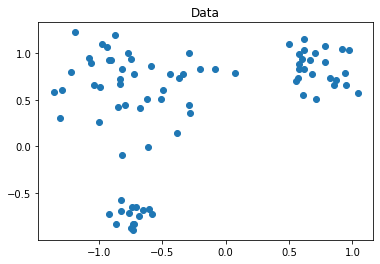

In [3]:
data = pd.read_csv("./datasets/points.txt")
data2 = data
plt.plot(data['y'], data['x'], 'o')
plt.title("Data")
plt.show()

Außerdem definieren wir eine weitere Funktionen für die grafische Darstellung des Clusterings.

In [4]:
def plot_clustering(data, k=None, vars=None):
	""" Plot the clustered data. """
	if vars == None:
		cols = list(data.columns)
	else:
		vars.append('cluster')
		vars = set(vars)
		vars = list(vars)
		cols = vars
	g = sns.pairplot(data[cols], hue='cluster', diag_kind='hist')
	if not k == None:
		plt.subplots_adjust(top=0.9)
		g.fig.suptitle(k + 2)
		g.fig.tight_layout()
	plt.subplots_adjust(left=0.05, bottom=0.05)
	plt.show()


### Clusteringmodelle
Nachdem wir unsere Daten nun generiert haben können wir mit dem eigentlichen Clustering beginnen. Dafür verwenden wir die Verfahren k-means, DBSCAN, HDBSCAN und OPTICS. Mit Ausnahme von HDBSCAN entstammen die Verfahren der scikit-learn Bibliothek. Für das HDBSCAN Verfahren gibt es aber ebenfalls eine <a href="https://github.com/scikit-learn-contrib/hdbscan">vorgefertigte Bibliothek</a> auf die wir zurückgegriffen haben. Dabei zählt k-means zu den <a href="https://rocketloop.de/clustering-mit-machine-learning/#partitionierendes-clustering">partitionierenden</a> Verfahren und die übrigen Verfahren werden als <a href="https://rocketloop.de/clustering-mit-machine-learning/#dichtebasiertes-clustering">dichtebasierte</a> Verfahren bezeichnet. Im Grunde sind HDBSCAN und OPTICS lediglich verbesserte Versionen des DBSCAN. Mit der Methode “fit_predict” von scikit-learn bestimmen wir mit jedem Modell die Zugehörigkeit eines Punktes zu einem Cluster.
An dieser Stelle stellen wir die verwendeten Verfahren kurz vor und erläutern ihre Funktionsweise.
#### k-means
Das k-means Verfahren teilt den Datensatz in k Teile auf. Dies geschieht in dem die Summe der quadratischen Abweichungen der einzelnen Punkte von den Clusterzentren minimiert wird. Problematisch an diesem Verfahren ist einerseits, dass bereits im Voraus die Anzahl der Cluster bestimmt werden muss, andererseits, kann das Verfahren mit Datensätzen mit variierender Dichte und Formen zum Teil nur schlecht umgehen. Dadurch ist es auf realen Datensätzen oftmals nicht bestens geeignet. Ebenfalls kann das Verfahren keine Noise Objekte, also Objekte die weit von einem Cluster entfernt liegen und diesem eigentlich nicht mehr zuzuordnen sind, nicht als solche erkennen.

In [5]:
def get_kmeans(data, n_clusters=3):
	""" Do kmeans clustering and return clustered data """
	kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10, max_iter=300)
	vals = data.iloc[ :, 0:].values
	y_pred = kmeans.fit_predict(StandardScaler().fit_transform(vals))
	data["cluster"] = y_pred
	return data, kmeans.inertia_

#### DBSCAN
DBSCAN steht für “Density-Based Spatial Clustering of Applications with Noise”. Die Grundannahme des DBSCAN Algorithmus besteht darin, dass Objekte eines Clusters dicht zusammenliegen. Es werden 3 Arten von Objekten unterschieden:
Kernobjekte sind Objekte die selbst dicht sind.
Dichte-erreichbare Objekte sind Objekte, die selbst nicht dicht, aber von einem Kernobjekt erreichbar sind.
Noisepunkte sind Objekte die weder dicht noch dichte-erreichbar sind.

Dabei wird ein Parameter epsilon und ein Parameter minPoints festgelegt. Epsilon bestimmt dabei die Distanz, ab wann ein Punkt von einem zweiten Punkt erreichbar ist, nämlich dann wenn ihr Abstand kleiner als epsilon ist. MinPoints legt fest, ab wann ein Objekt dicht ist, also wie viele Objekte innerhalb des Abstands epsilon um einen Punkt liegen müssen.

In [6]:
def get_dbscan(data, min_samples=3):
	""" Do dbscan clustering and return clustered data """
	db = DBSCAN(eps=0.37, min_samples=min_samples)
	vals = data.iloc[ :, 0:].values
	y_pred = db.fit_predict(StandardScaler().fit_transform(vals))
	data["cluster"] = y_pred
	return data

#### HDBSCAN
HDBSCAN steht für “Hierarchical Density-Based Spatial Clustering” und basiert auf dem DBSCAN Algorithmus. Er erweitert diesen, indem er den DBSCAN Algorithmus in einen hierarchischen Clusteringalgorithmus überführt. Deswegen benötigt er keinen Abstand epsilon zur Bestimmung der Cluster. Damit ist es möglich Cluster unterschiedlicher Dichte zu finden und somit eine große Schwachstelle von DBSCAN zu beheben. 

HDBSCAN funktioniert dabei, indem zunächst eine Zahl k festgelegt wird. Mit dieser wird bestimmt, wie viele Nachbarschaftsobjekte bei der Bestimmung der Dichte eines Punkts betrachtet werden. Hierin besteht ein entscheidender Unterschied im Vergleich zum DBSCAN Algorithmus. DBSCAN sucht in der gegebenen Distanz epsilon nach Nachbarn und HDBSCAN sucht nach der Distanz ab der k Objekte in der Nachbarschaft liegen. 

Nach dieser Zahl k wird die Kerndistanz für jeden Punkt bestimmt. Diese ist die kleinste Distanz, mit der k Objekte erreicht werden können. Außerdem wird eine Erreichbarkeitsmetrik eingeführt. Diese ist definiert als der größte Wert von entweder der Kerndistanz des Punktes A, der Kerndistanz des Punktes B, oder der Distanz von Punkt A zu Punkt B. Mit dieser Erreichbarkeitsmetrik wird anschließend ein minimaler Spannbaum gebildet. Mit Hilfe dieses Spannbaums wird nun die namensgebende Hierarchie gebildet.

In [7]:
def get_hdbscan(data, min_cluster_size=4):
	hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, gen_min_span_tree=True)
	vals = data.iloc[ : ,0: ].values
	y_pred = hdb.fit_predict(StandardScaler().fit_transform(vals))
	data["cluster"] = y_pred
	return data, hdb

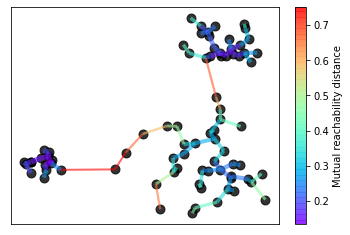

In [8]:
hdbsca, clusterer = get_hdbscan(data)
hdbsca = data.merge(hdbsca['cluster'])
clusterer.minimum_spanning_tree_.plot(edge_cmap="rainbow", edge_alpha=0.6, node_size=80, edge_linewidth=2)
plt.show()

Dazu wird immer die längste Kante aus dem Baum entfernt. Anschließend wird die Hierarchie zusammengefasst, indem in Abhängigkeit zur Distanz die einzelnen Punkte aus der Hierarchie herausfallen.

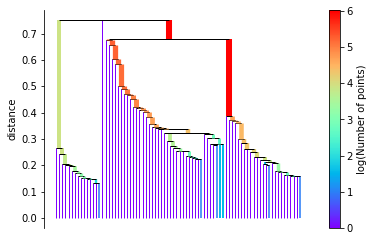

In [9]:
clusterer.single_linkage_tree_.plot(cmap="rainbow", colorbar=True)
plt.show()

Falls mehr als zu Beginn definierte min_cluster_size Punkte bei einer Distanz herausfallen, bilden diese einen neuen Teilbaum. Anschließend werden die Cluster ausgewählt, die die größte Stabilität aufweisen. Die Stabilität eines Cluster berechnet sich, in dem man die Summe der Kehrwerte der Distanz ab welcher ein Punkt aus einem Cluster fällt, für aller Punkte eine Clusters berechnet. Das heißt liegen viele Punkte nahe am Clusterzentrum hat der Cluster eine hohe Stabilität. Auf dem Bild erkennbar an einer großen Fläche.
(Bilder)

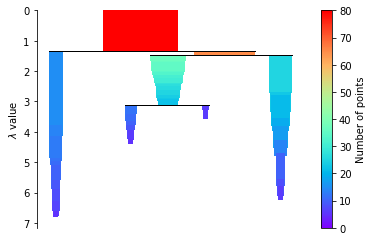

In [10]:
clusterer.condensed_tree_.plot(cmap="rainbow")
plt.show()

In [11]:
def get_hdbscan(data, min_cluster_size=4):
	hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, gen_min_span_tree=True)
	vals = data.iloc[ : ,0: ].values
	y_pred = hdb.fit_predict(StandardScaler().fit_transform(vals))
	data["cluster"] = y_pred
	return data, hdb

### Auswertung
Für unsere Auswertung haben wir uns entschieden, die Metriken Calinski-Harabasz Index, die Silhouettenmethode und für das k-means Clustering speziell das Elbow Kriterium zu verwenden. 

Wenn man sich die einzelnen Metriken für das k-means Clustering anschaut, stellt man fest, dass die optimale Anzahl an Clusterzentren 3 beträgt. Zwar deutet die Silhouettenmethode darauf hin, dass ein vierter Cluster durchaus sinnvoll wäre, allerdings spricht das Elbow Kriterium dagegen, da ein vierter Cluster keinen Knick bildet und somit nur einen sehr bedingten Mehrwert bietet. Nimmt man noch den Calinski-Harabasz Index dazu, erkennt man ebenfalls, dass der vierte Cluster nur einen schwach höheren Score erzielt. Daraus folgern wir, dass drei die optimale Anzahl an Clustern für ein k-means Clustering auf unserem Datensatz ist. Dieses Ergebnis gibt auch Sinn, wenn man bedenkt, dass wir unsere Daten um 3 Punkte generiert haben.

143.6711770895938 0.6278626278620039 2
448.6215211188014 0.768404457603863 3
671.1369269300901 0.8010289082001346 4
764.533899184523 0.8028142733249826 5
931.1854828126613 0.7979518327686173 6
1115.7934013358285 0.8086480148921067 7
1547.9100478849587 0.8305974102311214 8
1716.247178021661 0.8389737580132774 9
1809.7828694140592 0.8433058275670913 10
2772.1150413003425 0.8329932006348351 11


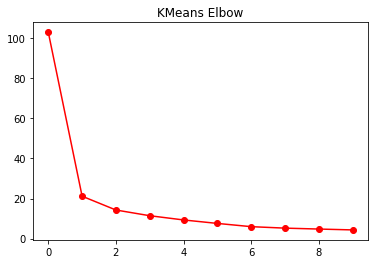

In [12]:
kmeans = []
elbow = []
calinskis = []
silhouettes = []
number_clusters = []

for i in range(10):
	temp1, temp2 = get_kmeans(data, i+2)
	kmeans.append(data.merge(temp1['cluster']))
	elbow.append(temp2)
	print(metrics.calinski_harabasz_score(data2, data['cluster']), \
          metrics.silhouette_score(data2, data['cluster']), (i+2))
	calinskis.append(metrics.calinski_harabasz_score(data2, data['cluster']))
	silhouettes.append(metrics.silhouette_score(data2, data['cluster']))
	number_clusters.append(i+2)
plt.plot(elbow,'ro-', label="Elbow")
plt.title("KMeans Elbow")
plt.show()
kmean,temp = get_kmeans(data)
kmean = data.merge(kmean['cluster'])

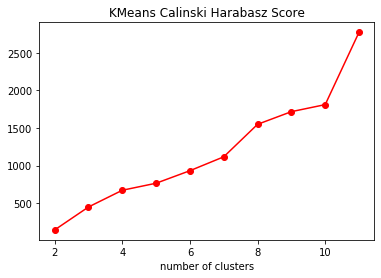

In [13]:
plt.plot(number_clusters, calinskis, 'ro-', label="KMeans Ralinski Harabasz Score")
plt.title("KMeans Calinski Harabasz Score")
plt.xlabel("number of clusters")
plt.show()

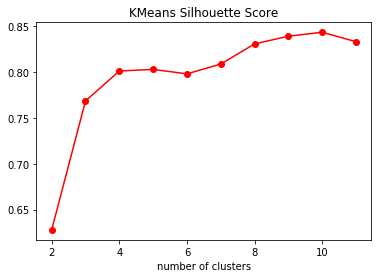

In [14]:
plt.plot(number_clusters, silhouettes,'ro-', label="KMeans Silhouette Score")
plt.title("KMeans Silhouette Score")
plt.xlabel("number of clusters")
plt.show()

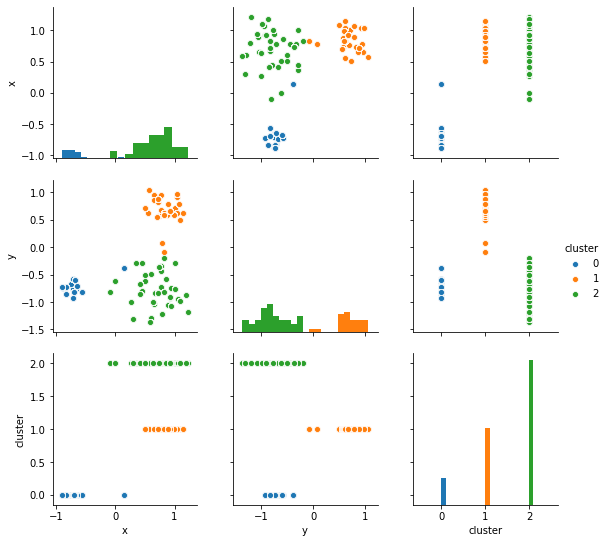

In [15]:
plot_clustering(kmean)

Für die beiden anderen Clusteringverfahren können wir die Anzahl der zu findenden Cluster nicht vorher bestimmen, sondern lediglich die Parameter vorgeben, nach denen die Cluster gebildet werden sollen. So haben wir uns dafür entschieden für das DBSCAN Verfahren die Distanz epsilon festzulegen und lediglich die Anzahl der minPoints zu variieren. Dabei deutete die Silhouettenmethode auf die Anzahl von vier minPoints hin. Dagegen spricht der Calinski-Harabasz Index dafür nur drei minPoints festzulegen. Da der Unterschied von drei auf vier minPoints in der Silhouettenmethode geringer ausfällt als bei dem Calinski-Harabasz Index entscheiden wir uns dafür, den Wert auf drei festzulegen. Dabei entsteht folgendes Clustering:

409.0315226958417 0.730999023132395
434.5392377092388 0.7353822581805284
423.27426828423955 0.7297055736625065
455.60636211507324 0.7315116917502247
536.8738218968508 0.7380826713603398
554.1814795817995 0.7414126946036408
384.1792588087254 0.7178254607350658
306.5343514633772 0.6866531405315872


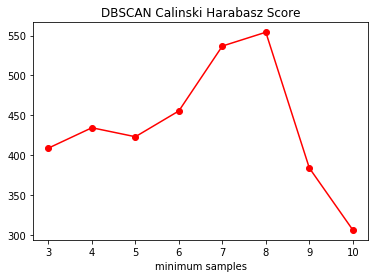

In [16]:
calinskis = []
silhouettes = []
min_samples = []
for i in range (8):
	dbsca = data.merge(get_dbscan(data, i+3)['cluster'])
	calinskis.append(metrics.calinski_harabasz_score(data2, data['cluster']))
	silhouettes.append(metrics.silhouette_score(data2, data['cluster']))
	min_samples.append((i+3))
	print(metrics.calinski_harabasz_score(data2, data['cluster']),\
          metrics.silhouette_score(data2, data['cluster']))
plt.plot(min_samples, calinskis, 'ro-', label="DBSCAN Ralinski Harabasz Score")
plt.title("DBSCAN Calinski Harabasz Score")
plt.xlabel("minimum samples")
plt.show()

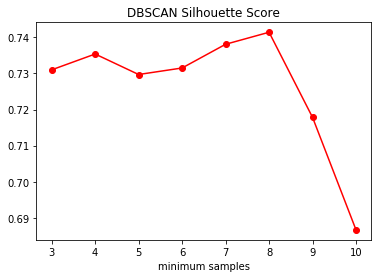

In [17]:
plt.plot(min_samples, silhouettes,'ro-', label="DBSCAN Silhouette Score")
plt.title("DBSCAN Silhouette Score")
plt.xlabel("minimum samples")
plt.show()

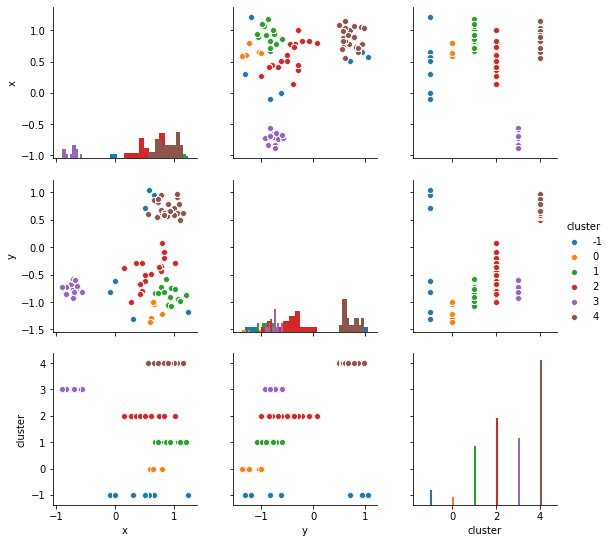

In [18]:
dbsca = data.merge(get_dbscan(data)['cluster'])
plot_clustering(dbsca)

Wir erkennen, dass der Algorithmus sich für 4 Clusterzentren entschieden hat. Dabei wird deutlich, dass der DBSCAN Algorithmus Schwierigkeiten bei unterschiedlich dichten Clustern bekommt.
Beim HDBSCAN Verfahren variieren wir die kleinste Clustergröße. Das ist die Anzahl an Punkten, die bei dem hierarchischen Verfahren nötig ist, dass ein oder mehrere abgetrennte Punkte als neuer Cluster angesehen werden. Hierbei erhalten wir folgende Ergebnisse für den Calinski-Harabasz Index und die Silhouettenmethode. Dabei erkennen wir, dass die optimale Größe zwischen vier und fünf Punkten liegt. Wir entscheiden uns für vier und erhalten folgendes Ergebnis.

333.4228992858206 0.7273963707789622
654.4267717254961 0.7860566014117069
651.5589812932111 0.7908005448530104
319.8495630851444 0.7201520602759448
553.9072481033943 0.7756906650206093
636.4702698218282 0.7860307162038978
482.9247237225337 0.7640206128662527
399.86372633821446 0.7739822851543199


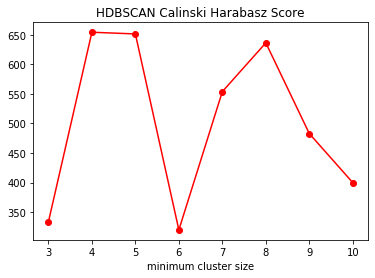

In [19]:
calinskis = []
silhouettes = []
min_cluster_size = []
for i in range (8):
	hdbsca, clusterer = get_hdbscan(data, i+3)
	hdbsca = data.merge(hdbsca)
	calinskis.append(metrics.calinski_harabasz_score(data2, data['cluster']))
	silhouettes.append(metrics.silhouette_score(data2, data['cluster']))
	min_cluster_size.append(i+3)
	print(metrics.calinski_harabasz_score(data2, data['cluster']), \
          metrics.silhouette_score(data2, data['cluster']))
hdbsca, clusterer = get_hdbscan(data)
hdbsca = data.merge(hdbsca['cluster'])
plt.plot(min_cluster_size, calinskis,'ro-', label="HDBSCAN Ralinski Harabasz Score")
plt.title("HDBSCAN Calinski Harabasz Score")
plt.xlabel("minimum cluster size")
plt.show()

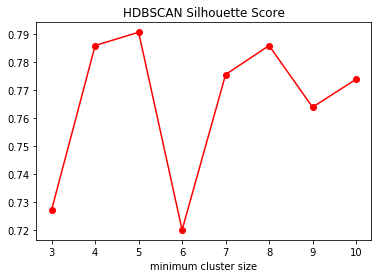

In [20]:
plt.plot(min_cluster_size, silhouettes,'ro-', label="HDBSCAN Silhouette Score")
plt.title("HDBSCAN Silhouette Score")
plt.xlabel("minimum cluster size")
plt.show()

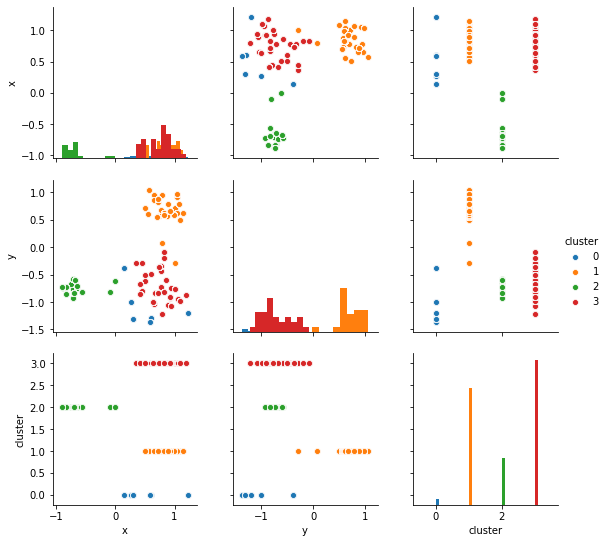

In [21]:
plot_clustering(hdbsca)

## Fazit
Es sollte deutlich geworden sein, dass es schwierig sein kann Clusteringergebnisse auf einem Datensatz auf ihre Richtigkeit einzuordnen. Es gibt viele weitere Verfahren, die ebenfalls unterschiedliche Lösungen hervorgebracht hätten. Die Metriken zur Validierung der Clusteringergebnisse eignen sich im Einzelnen nur bedingt und so ist es stets sinnvoll eine Vielzahl von Metriken zur Hilfe zu ziehen und diese miteinander zu vergleichen, um somit den geeignetsten Algorithmus für den jeweiligen Anwendungsfall finden zu können und die Parameter bestens abstimmen zu können. Trotz der genannten Schwächen ermöglichen Clusteringverfahren auch höher dimensionale Daten in Gruppen einzuteilen, falls die genannten Punkte berücksichtigt werden.